In [20]:
import openslide
import json
import boto3
import botocore
from openslide.deepzoom import DeepZoomGenerator
import math
import os
import numpy as np

In [6]:
##
# Get all annotated slides
# annotated_slides = set([slides['slideId'] for slides in annotations])
#
# download image from s3 for particular slide
# aws s3 cp s3://pathai-cmu-capstone/TCGA_LUSC/80147_TCGA-77-6843-01Z-00-DX1.5ced4995-81a1-4dfd-82b2-0cabf4538bc5.svs test.svs
#
# s3 = boto3.resource('s3')
# BUCKET_NAME = 'pathai-cmu-capstone'
# #KEY = 'TCGA_LUSC/80147_TCGA-77-6843-01Z-00-DX1.5ced4995-81a1-4dfd-82b2-0cabf4538bc5.svs'
# KEY = 'TCGA_LUSC/80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs'
# DOWNLOAD_LOC = KEY.replace('TCGA_LUSC','tcga_data')
# print(DOWNLOAD_LOC)
# try:
#     s3.Bucket(BUCKET_NAME).download_file(KEY,DOWNLOAD_LOC)
# except botocore.exceptions.ClientError as e:
#     if e.response['Error']['Code'] == "404":
#         print("The object does not exist.")
#     else:
#         raise
#

In [8]:
s3 = boto3.resource('s3')
BUCKET_NAME = 'pathai-cmu-capstone'
#KEY = 'TCGA_LUSC/80147_TCGA-77-6843-01Z-00-DX1.5ced4995-81a1-4dfd-82b2-0cabf4538bc5.svs'
KEY = 'TCGA_LUSC/80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs'
DOWNLOAD_LOC = KEY.replace('TCGA_LUSC','tcga_data')
print(DOWNLOAD_LOC)
try:
    if os.path.isfile(DOWNLOAD_LOC):
        print("File already exists")
        #continue
    else:
        s3.Bucket(BUCKET_NAME).download_file(KEY,DOWNLOAD_LOC)
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

tcga_data/80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs
File already exists


In [9]:
lusc_slides_filename = 'tcga_data/lusc_slides.txt'
annotations_filename = 'tcga_data/annotations.txt'

image_filename = 'tcga_data/80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs'
wsi = openslide.OpenSlide(image_filename)

In [10]:
with open(lusc_slides_filename,'r') as an:
    lusc_slides = json.load(an)

In [11]:
with open(annotations_filename,'r') as an:
    annotations = json.load(an)

In [12]:
annotations[0]

{'slideId': 19175,
 'annotationId': 856444,
 'userId': 4,
 'jobId': None,
 'shape': [[125403, 13447]],
 'annotationSubstanceId': 335,
 'active': True,
 'frameId': None,
 'deleter': None}

In [13]:
bleh = [(slide["shape"],slide["annotationSubstanceId"]) for slide in annotations if slide["slideId"]==80263  ]

In [15]:
bleh

[([[1561, 33487],
   [1566, 33670],
   [1604, 33838],
   [1647, 33959],
   [1705, 34094],
   [1763, 34209],
   [1710, 34402],
   [1652, 34609],
   [1710, 34677],
   [1859, 34691],
   [1932, 34720],
   [1802, 34898],
   [1643, 34975],
   [1541, 35076],
   [1440, 35163],
   [1339, 35206],
   [1219, 35245],
   [1137, 35274],
   [925, 35211],
   [776, 35086],
   [665, 34932],
   [593, 34787],
   [515, 34657],
   [318, 34522],
   [159, 34416],
   [67, 34258],
   [39, 34103],
   [188, 34118],
   [332, 34195],
   [467, 34267],
   [578, 34291],
   [583, 34219],
   [453, 34094],
   [429, 33968],
   [588, 33988],
   [708, 34046],
   [862, 34055],
   [776, 33824],
   [862, 33588],
   [1069, 33622],
   [1277, 33598]],
  331),
 ([[2409, 50085]], 335),
 ([[2486, 50108]], 335),
 ([[2537, 50146]], 335),
 ([[2597, 50169]], 335),
 ([[2690, 50156]], 335),
 ([[2782, 50137]], 335),
 ([[2805, 50281]], 335),
 ([[2878, 50311]], 335),
 ([[2870, 50394]], 335),
 ([[2606, 50238]], 335),
 ([[2338, 50449]], 335),
 

In [17]:
annotated_slides = set([slides['slideId'] for slides in annotations])

In [18]:
download_slide_names = []
for slide in lusc_slides:
    if slide['slideId'] in annotated_slides:
        print(str(slide['slideId'])+'_'+slide['originalName'])
        download_slide_names.append(str(slide['slideId'])+'_'+slide['originalName'])

80147_TCGA-77-6843-01Z-00-DX1.5ced4995-81a1-4dfd-82b2-0cabf4538bc5.svs
80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs
80330_TCGA-39-5031-01Z-00-DX1.f9264b3b-9fdf-4fb7-8752-2d3ffd3de3ea.svs
80366_TCGA-85-8664-01Z-00-DX1.d83b183e-4cc6-4608-93fb-46e69d36a2fa.svs
80623_TCGA-85-7698-01Z-00-DX1.bc8a89a7-356e-4913-9632-627774730f48.svs
80646_TCGA-60-2698-01Z-00-DX1.738ae69e-5170-46d6-b691-9f761f9a794b.svs
80783_TCGA-33-A5GW-01Z-00-DX2.8E12990B-CA60-4C94-9309-9A0DA6C63588.svs
80826_TCGA-60-2695-01Z-00-DX1.4cc6c566-d60d-4ff9-9ea8-18a9da46ae6b.svs
80865_TCGA-68-7756-01Z-00-DX1.15BEAECF-8C36-4761-85A8-EC9E54B61A0C.svs
80876_TCGA-18-3415-01Z-00-DX1.8C62F2CD-4A2F-4D1E-A662-D7D5AFE557AB.svs
81063_TCGA-22-5482-01Z-00-DX1.901F90D4-1F4E-4344-925B-37B7DD78B751.svs
81124_TCGA-66-2790-01Z-00-DX1.86f436e3-e233-4986-90bb-aaa2adc4596f.svs
81144_TCGA-33-4586-01Z-00-DX2.a9798fe4-8db9-41d7-8d00-eb2a9eef1bc0.svs
81205_TCGA-66-2758-01Z-00-DX1.23611c66-bd21-47d1-abb0-2f3da38c377f.svs
81214_

In [25]:
#print(np.random.choice(len(download_slide_names), 1))
random_slide = download_slide_names[np.random.choice(len(download_slide_names), 1)[0]]
print(random_slide)

87413_TCGA-34-5232-01Z-00-DX1.7483c36b-8473-439b-a726-2821ec834fc2.svs


In [28]:
lusc_slides

##Filter 
x = filter(lambda slide: slide['slideId'] == 80101, lusc_slides)
for i in x:
    print(i)

{'stainName': 'FFPE', 'caseName': 'TCGA-63-5131', 'slideId': 80101, 'registeredName': None, 's3Path': 'datasets/64/01f1fb12-86cf-4d24-8286-7e8b625e18a3/TCGA-63-5131-01Z-00-DX1.C1C3724A-D9FC-46D6-9D7B-9357A58ACAEF.svs', 'slideGroupName': 'LUSC', 'originalPath': None, 'originalName': 'TCGA-63-5131-01Z-00-DX1.C1C3724A-D9FC-46D6-9D7B-9357A58ACAEF.svs', 'slideStatus': 'Visible'}


In [29]:
props = wsi.properties

In [30]:
print( props['openslide.level[0].height'], props['openslide.level[0].width'] )
print(props)
print()

81540 45696
<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'ap1546-dsr', 'aperio.Date': '02/04/11', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '23681', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '23681', 'aperio.Left': '13.325425', 'aperio.LineAreaXOffset': '0.004954', 'aperio.LineAreaYOffset': '-0.003469', 'aperio.LineCameraSkew': '0.000963', 'aperio.MPP': '0.2462', 'aperio.OriginalHeight': '81640', 'aperio.OriginalWidth': '47616', 'aperio.ScanScope ID': 'SS1546', 'aperio.StripeWidth': '992', 'aperio.Time': '08:44:15', 'aperio.Top': '22.741652', 'aperio.User': 'b5ba6f6b-2071-47b4-9236-e5da73797445', 'openslide.comment': 'Aperio Image Library v10.2.41\r\n47616x81640 [0,100 45696x81540] (240x240) J2K/YUV16 Q=70|AppMag = 40|StripeWidth = 992|ScanScope ID = SS1546|Filename = 23681|Date = 02/04/11|Time = 08:44:15|User = b5ba6f6b-2071-47b4-9236-e5da73797445|MPP = 0

In [31]:
def get_20x_zoom_level(slide, generator):
    """
  Return the zoom level that corresponds to a 20x magnification.
  The generator can extract tiles from multiple zoom levels,
  downsampling by a factor of 2 per level from highest to lowest
  resolution.
  Args:
    slide: An OpenSlide object representing a whole-slide image.
    generator: A DeepZoomGenerator object representing a tile generator.
      Note: This generator is not a true "Python generator function",
      but rather is an object that is capable of extracting individual
      tiles.
  Returns:
    Zoom level corresponding to a 20x magnification, or as close as
    possible.
    """
    highest_zoom_level = generator.level_count - 1  # 0-based indexing
    try:
        mag = int(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])
    # `mag / 20` gives the downsampling factor between the slide's
    # magnification and the desired 20x magnification.
    # `(mag / 20) / 2` gives the zoom level offset from the highest
    # resolution level, based on a 2x downsampling factor in the
    # generator.
        print(mag)
        offset = math.floor(int(mag / 20) / 2)
        level = highest_zoom_level - offset
        print(level)
    except (ValueError, KeyError) as e:
    # In case the slide magnification level is unknown, just
    # use the highest resolution.
        level = highest_zoom_level
    return level

In [84]:
def create_tile_generator(slide, tile_size, overlap):
    """
  Create a tile generator for the given slide.
  This generator is able to extract tiles from the overall
  whole-slide image.
  Args:
    slide: An OpenSlide object representing a whole-slide image.
    tile_size: The width and height of a square tile to be generated.
    overlap: Number of pixels by which to overlap the tiles.
  Returns:
    A DeepZoomGenerator object representing the tile generator. Each
    extracted tile is a PIL Image with shape
    (tile_size, tile_size, channels).
    Note: This generator is not a true "Python generator function", but
    rather is an object that is capable of extracting individual tiles.
    """
    generator = DeepZoomGenerator(slide, tile_size=tile_size, overlap=overlap, limit_bounds=True)
    return generator

In [85]:
slide_name = 'tcga_data/80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs'
tile_size = 256
overlap = 1

generator = create_tile_generator(wsi, tile_size=tile_size, overlap=1)
zoom_level = get_20x_zoom_level(wsi, generator)
  # Generate all possible (zoom_level, col, row) tile index tuples.
cols, rows = generator.level_tiles[zoom_level]
tile_indices = [(slide_name, tile_size, overlap, zoom_level, col, row)
                  for col in range(cols) for row in range(rows)]

40
16


In [86]:
print(generator.level_count, generator.level_tiles[17], len(tile_indices))

18 (179, 319) 14400


In [87]:
def process_tile_index(tile_index, tile_indices):
    """
  Generate a tile from a tile index.
  Given a (slide_num, tile_size, overlap, zoom_level, col, row) tile
  index, generate a (slide_num, tile) tuple.
  Args:
    tile_index: A (slide_num, tile_size, overlap, zoom_level, col, row)
      integer index tuple representing a tile to extract.
    folder: Directory in which the slides folder is stored, as a string.
      This should contain either a `training_image_data` folder with
      images in the format `TUPAC-TR-###.svs`, or a `testing_image_data`
      folder with images in the format `TUPAC-TE-###.svs`.
    training: Boolean for training or testing datasets.
  Returns:
    A (slide_num, tile) tuple, where slide_num is an integer, and tile
    is a 3D NumPy array of shape (tile_size, tile_size, channels) in
    RGB format.
    """
    slide_name, tile_size, overlap, zoom_level, col, row = tile_indices[tile_index]
  # Open slide.
    slide = openslide.OpenSlide(slide_name)
  # Create tile generator.
    generator = create_tile_generator(slide, tile_size, overlap)
  # Generate tile.
    tile = np.asarray(generator.get_tile(zoom_level, (col, row)))
    return (slide_name, tile, generator)

In [123]:
import numpy as np
index = 2345#2000 Good Slide
        #2222 Background 
        #2345 Good of both
name, tile, generator = process_tile_index(index, tile_indices)

('tcga_data/80263_TCGA-66-2737-01Z-00-DX1.3c508c22-fadc-4b05-ada4-b447b21e098c.svs', 256, 1, 16, 14, 105)


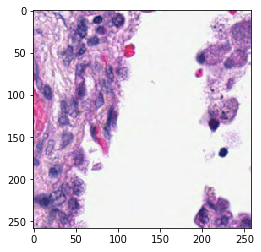

In [124]:
tile
import matplotlib.pyplot as plt
print(tile_indices[index])
imgplot = plt.imshow(tile)
plt.show()

16
(7166, 53758) 0 (516, 516)


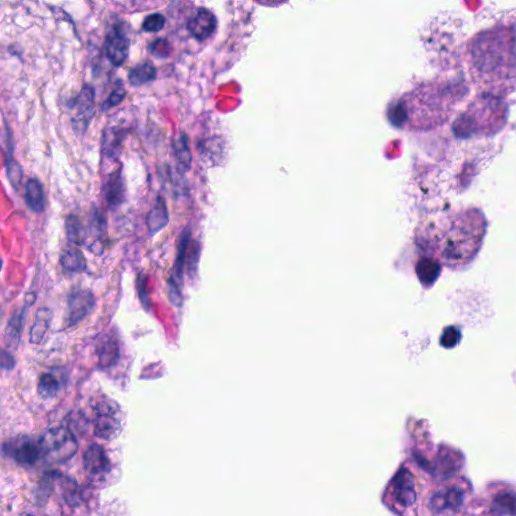

In [125]:
slide = openslide.OpenSlide(slide_name)
slide_name, tile_size, overlap, zoom_level, col, row = tile_indices[index]
print(zoom_level)
location, level, size = generator.get_tile_coordinates(zoom_level,(col,row))
print(location, level, size)
slide.read_region(location, level, size)

In [126]:
def process_tile(tile_tuple, sample_size, grayscale):
    """
  Process a tile into a group of smaller samples.
  Cut up a tile into smaller blocks of sample_size x sample_size pixels,
  change the shape of each sample from (H, W, channels) to
  (channels, H, W), then flatten each into a vector of length
  channels*H*W.
  Args:
    tile_tuple: A (slide_num, tile) tuple, where slide_num is an
      integer, and tile is a 3D NumPy array of shape
      (tile_size, tile_size, channels).
    sample_size: The new width and height of the square samples to be
      generated.
    grayscale: Whether or not to generate grayscale samples, rather
      than RGB.
  Returns:
    A list of (slide_num, sample) tuples representing cut up tiles,
    where each sample is a 3D NumPy array of shape
    (sample_size_x, sample_size_y, channels).
    """
    slide_num, tile = tile_tuple
    if grayscale:
        tile = rgb2gray(tile)[:, :, np.newaxis]  # Grayscale
    # Save disk space and future IO time by converting from [0,1] to [0,255],
    # at the expense of some minor loss of information.
        tile = np.round(tile * 255).astype("uint8")
    x, y, ch = tile.shape
  # 1. Reshape into a 5D array of (num_x, sample_size_x, num_y, sample_size_y, ch), where
  # num_x and num_y are the number of chopped tiles on the x and y axes, respectively.
  # 2. Swap sample_size_x and num_y axes to create
  # (num_x, num_y, sample_size_x, sample_size_y, ch).
  # 3. Combine num_x and num_y into single axis, returning
  # (num_samples, sample_size_x, sample_size_y, ch).
    samples = (tile.reshape((x // sample_size, sample_size, y // sample_size, sample_size, ch))
                 .swapaxes(1,2)
                 .reshape((-1, sample_size, sample_size, ch)))
    samples = [(slide_num, sample) for sample in list(samples)]
    return samples


In [127]:
def optical_density(tile):
    """
    Convert a tile to optical density values.
    Args:
    tile: A 3D NumPy array of shape (tile_size, tile_size, channels).
    Returns:
    A 3D NumPy array of shape (tile_size, tile_size, channels)
    representing optical density values.
    """
    tile = tile.astype(np.float64)
  #od = -np.log10(tile/255 + 1e-8)
    od = -np.log((tile+1)/240)
    return od

tile (258, 258, 3)
GRAY


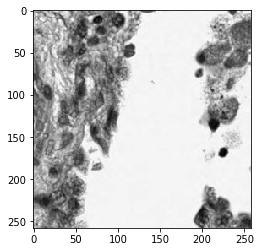

Complement


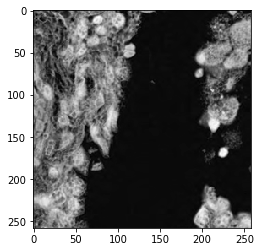

CANNY


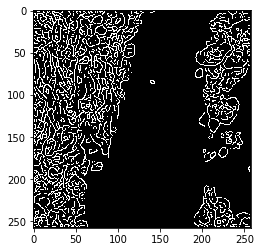

BINARY CLOSING


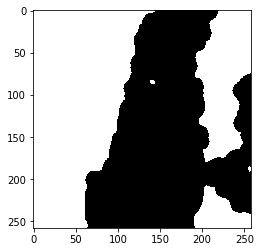

DILATION


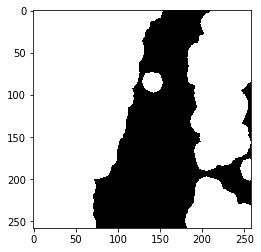

FILL HOLES


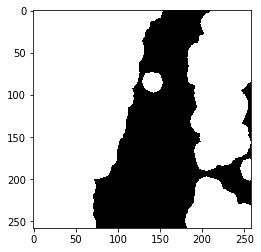

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Percentage = 0.6540923021453038
OPTICAL _DENSITY


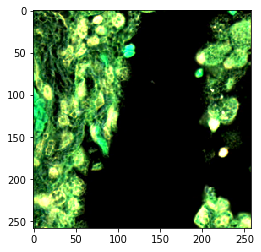

FILL HOLES


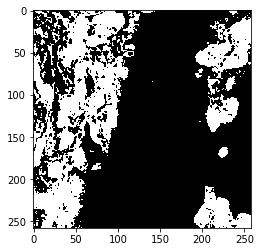

FILL HOLES


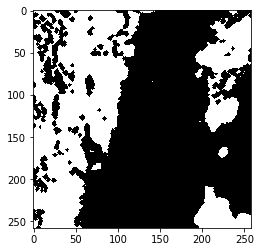

FILL HOLES


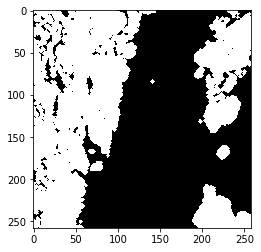

FILL HOLES


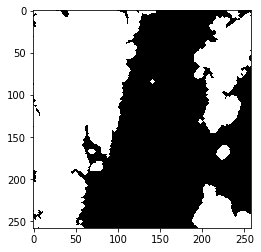

Percentage = 0.4762784688420167
True


In [128]:
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.morphology import binary_closing, binary_dilation, disk
from scipy.ndimage.morphology import binary_fill_holes

name, tile, generator = process_tile_index(index, tile_indices)
tissue_threshold = 0.5
tile_size = 258
"""
  Determine if a tile should be kept.
  This filters out tiles based on size and a tissue percentage
  threshold, using a custom algorithm. If a tile has height &
  width equal to (tile_size, tile_size), and contains greater
  than or equal to the given percentage, then it will be kept;
  otherwise it will be filtered out.
  Args:
    tile_tuple: A (slide_num, tile) tuple, where slide_num is an
      integer, and tile is a 3D NumPy array of shape
      (tile_size, tile_size, channels).
    tile_size: The width and height of a square tile to be generated.
    tissue_threshold: Tissue percentage threshold.
  Returns:
    A Boolean indicating whether or not a tile should be kept for
    future usage.
"""

if tile.shape[0:2] == (tile_size, tile_size):
    tile_orig = tile
# Check 1
# Convert 3D RGB image to 2D grayscale image, from
# 0 (dense tissue) to 1 (plain background).
    print("tile",tile.shape)
    tile = rgb2gray(tile)
    print("GRAY")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# 8-bit depth complement, from 1 (dense tissue)
# to 0 (plain background).
    print("Complement")
    tile = 1 - tile
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# Canny edge detection with hysteresis thresholding.
# This returns a binary map of edges, with 1 equal to
# an edge. The idea is that tissue would be full of
# edges, while background would not.
    print("CANNY")
    tile = canny(tile)
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# Binary closing, which is a dilation followed by
# an erosion. This removes small dark spots, which
# helps remove noise in the background.
    print("BINARY CLOSING")
    tile = binary_closing(tile, disk(10))
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# Binary dilation, which enlarges bright areas,
# and shrinks dark areas. This helps fill in holes
# within regions of tissue.
    print("DILATION")
    tile = binary_dilation(tile, disk(10))
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# Fill remaining holes within regions of tissue.
    
    tile = binary_fill_holes(tile)
    print("FILL HOLES")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# Calculate percentage of tissue coverage.
    percentage = tile.mean()
    print("Percentage =", percentage)
    check1 = percentage >= tissue_threshold

# Check 2
# Convert to optical density values
    tile = optical_density(tile_orig)
    print("OPTICAL _DENSITY")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
# Threshold at beta
    beta = 0.15
    tile = np.min(tile, axis=2) >= beta
# Apply morphology for same reasons as above.
    print("FILL HOLES")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
    tile = binary_closing(tile, disk(2))
    print("FILL HOLES")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
    tile = binary_dilation(tile, disk(2))
    print("FILL HOLES")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
    tile = binary_fill_holes(tile)
    print("FILL HOLES")
    imgplot = plt.imshow(tile,cmap="gray")
    plt.show()
    percentage = tile.mean()
    print("Percentage =", percentage)
    check2 = percentage >= tissue_threshold

    print (check1) and (check2)
else:
    print("False")


In [129]:
tile.shape[0:2]

(258, 258)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])